<a href="https://colab.research.google.com/github/GitAd7/Machine-Learning/blob/main/SVR_Project_Predicting_Baltimore_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Problem Statement
Given a dataset which captures the salary from July 1st, 2013 through June 30th 2014. It includes only those employess who are employed on June 30 2014. Predict the salary of Employess Working in Baltimore.

# Importing the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Lochana24/Baltimore-Salary-Prediction/main/train.csv')

In [3]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [4]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [5]:
df.shape

(18981, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [7]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [8]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [10]:
# Removing 70 values of Hiredate 
df=df.dropna(subset=['HireDate'])
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [11]:
newdf = df.copy()

In [12]:
# Removing the leading and trailing spaces and converting all the columns in lowercase
newdf.columns = newdf.columns.str.strip().str.lower()

In [13]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [14]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,grosspay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [15]:
# checking the null values
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [16]:
newdf.drop('grosspay', axis=1, inplace=True)

In [17]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary'], dtype='object')

In [18]:
# V;aue counts for agency id
newdf.agencyid.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: agencyid, Length: 1177, dtype: int64

In [19]:
newdf.agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: agency, Length: 65, dtype: int64

In [20]:
newdf.jobtitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: jobtitle, Length: 1073, dtype: int64

In [21]:
newdf.annualsalary.value_counts()

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$58227.00       1
$41704.00       1
$44700.00       1
$43000.00       1
$900.00         1
Name: annualsalary, Length: 1590, dtype: int64

In [22]:
# Remove the $ from the annual salary and chane the type to int
newdf['annualsalary'] = newdf['annualsalary'].str.strip('$').astype(float)

In [23]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [24]:
newdf[["hiremonth", "hiredate", "hireyear"]] = newdf['hiredate'].str.split('/', expand = True)

In [25]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,hiremonth,hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,11310.0,06,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,53428.0,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,68300.0,09,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,62000.0,07,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,43999.0,07,2013


In [26]:
col_sal = newdf.pop('annualsalary')
newdf = newdf.assign(annualsalary = col_sal)

In [27]:
# Mapping jobtitle to annualsalary
mean_encoded_JobTitle=newdf.groupby('jobtitle')['annualsalary'].mean()
newdf['jobtitle']=newdf['jobtitle'].map(mean_encoded_JobTitle)
print(newdf['jobtitle'])

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: jobtitle, Length: 18911, dtype: float64


In [28]:
# Mapping agency to annualsalary
mean_encoded_Agency=newdf.groupby('agency')['annualsalary'].mean()
newdf['agency']=newdf['agency'].map(mean_encoded_Agency)
print(newdf['agency'])

0        11310.270645
1        51495.424242
2        65360.307263
3        39980.900360
4        61579.081503
             ...     
18976    11310.270645
18977    11346.315789
18978    61579.081503
18979    61579.081503
18980    42565.513078
Name: agency, Length: 18911, dtype: float64


In [29]:
# Mapping agencyid to annualsalary
mean_encoded_AgencyID=newdf.groupby('agencyid')['annualsalary'].mean()
newdf['agencyid']=newdf['agencyid'].map(mean_encoded_AgencyID)
print(newdf['agencyid'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: agencyid, Length: 18911, dtype: float64


In [30]:
newdf.isnull().sum()

name            0
jobtitle        0
agencyid        0
agency          0
hiredate        0
hiremonth       0
hireyear        0
annualsalary    0
dtype: int64

In [31]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,hiremonth,hireyear,annualsalary
0,"Aaron,Keontae E",11313.967200,11310.000000,11310.270645,10,06,2013,11310.0
1,"Aaron,Patricia G",47443.500000,46667.000000,51495.424242,24,10,1979,53428.0
2,"Aaron,Petra L",69750.666667,65926.133333,65360.307263,25,09,2006,68300.0
3,"Abaineh,Yohannes T",57940.000000,48071.851064,39980.900360,23,07,2009,62000.0
4,"Abbene,Anthony M",44531.160494,44012.307229,61579.081503,24,07,2013,43999.0


In [32]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18911 non-null  object 
 1   jobtitle      18911 non-null  float64
 2   agencyid      18911 non-null  float64
 3   agency        18911 non-null  float64
 4   hiredate      18911 non-null  object 
 5   hiremonth     18911 non-null  object 
 6   hireyear      18911 non-null  object 
 7   annualsalary  18911 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.3+ MB


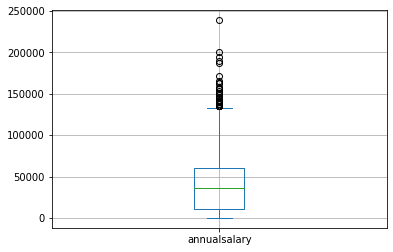

In [33]:
newdf.annualsalary.plot.box()
plt.grid()

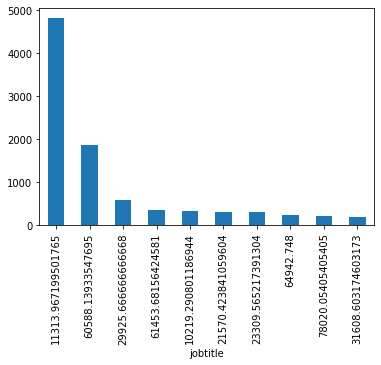

In [34]:
# Plot Top 10 jobs based on hiring 
newdf.groupby(['jobtitle'])['name'].count().sort_values(ascending= False).head(10).plot.bar()

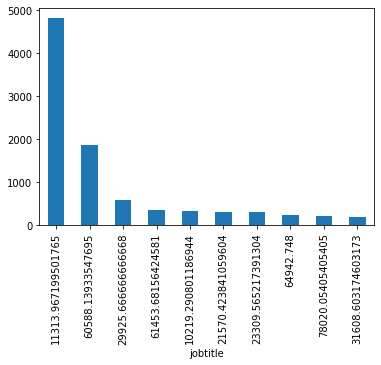

In [35]:
# Plot top 10 jobs based on salary
newdf.groupby(['jobtitle'])['annualsalary'].count().sort_values(ascending= False).head(10).plot.bar()

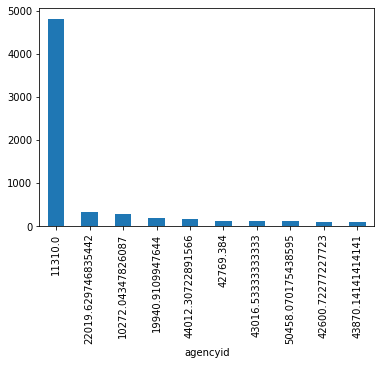

In [36]:
# Agency id that has highest number of employees
newdf.groupby(['agencyid'])['name'].count().sort_values(ascending= False).head(10).plot.bar()

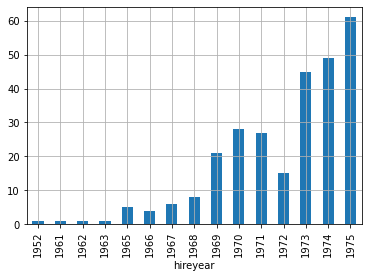

In [37]:
# Hire Year v/s Salary
newdf.groupby(['hireyear'])['annualsalary'].count().head(15).plot.bar()
plt.grid()

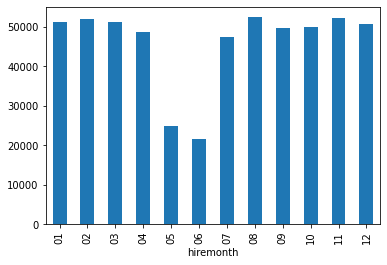

In [38]:
# Avg. salary v/s hire month
newdf.groupby(['hiremonth'])['annualsalary'].mean().plot.bar()

In [39]:
# Drop Name(As Dependent) and Hiredate(as Split into date, month and year)
newdf.drop(['name', 'hiredate'], axis=1, inplace=True)

<Figure size 720x720 with 0 Axes>

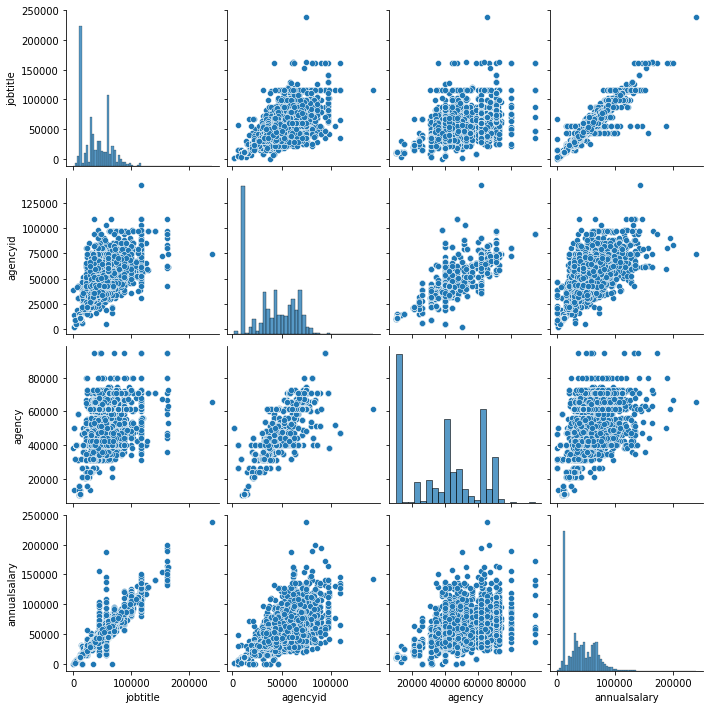

In [40]:
plt.figure(figsize=(10,10))
sns.pairplot(newdf)
plt.show()
# No correlation found whatsoever

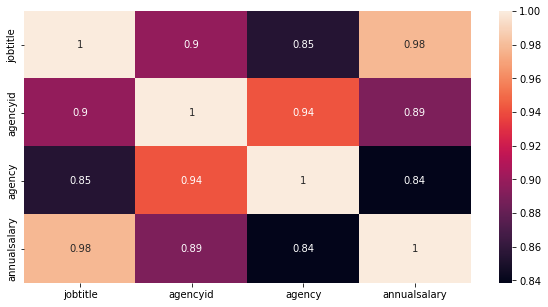

In [41]:
plt.figure(figsize= (10,5))
sns.heatmap(newdf.corr(), annot= True)

# Feature Selection

In [42]:
X = newdf.iloc[:,:-1].values
Y = newdf['annualsalary'].values

In [43]:
stanScaler = StandardScaler()

In [44]:
X = stanScaler.fit_transform(X)
Y = stanScaler.fit_transform(Y.reshape(-1,1))

# Splitting the DataFrame

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

# Choosing the Model

In [46]:
model = SVR(kernel='rbf')

# Training the Model

In [47]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [48]:
model.intercept_

array([1.0221617])

# Taking Prediction

In [49]:
Y_pred = model.predict(X_test)

In [50]:
Y_pred = stanScaler.inverse_transform(Y_pred.reshape(-1,1))
Y_test = stanScaler.inverse_transform(Y_test.reshape(-1,1))

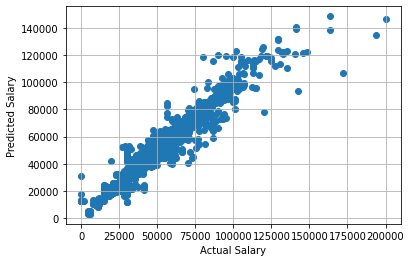

In [51]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid()

In [52]:
r2_score(Y_test, Y_pred)

0.9723539987334092

In [53]:
mean_absolute_error(Y_test, Y_pred)

2273.751084363462

In [54]:
mean_squared_error(Y_test, Y_pred)

17654691.040893927